In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
import re

def batch_result(out_file):
    # Read the contents of the file
    with open(out_file, 'r') as file:
        output = file.read()

    # def clean_string(s):
    #     # Remove backspace characters and anything that's not a digit, period, or minus sign
    #     return re.sub(r'[\x08]|[^0-9.-]', '', s)

    # Regular expressions for batch-level data
    # batch_pattern = re.compile(r'(\d+)/\d+ \[.*?\] - ETA: .*? - loss: (.*?) - accuracy: (.*?)\s')
    batch_pattern = re.compile(r'(\d+)/\d+ \[.*?\] - ETA: .*? - loss: ([\d.-]+(?:e-?\d+)?) - accuracy: ([\d.-]+)')


    # Find all matches in the output
    batch_data = batch_pattern.findall(output)

    batch_results = [{'index': i,
                    'batch': int(batch), 
                    # 'loss': float(clean_string(loss)), 
                    'loss': float(loss), 
                    # 'accuracy': float(clean_string(accuracy)),
                    'accuracy': float(accuracy)}
                    for i,(batch, loss, accuracy) in enumerate(batch_data, start=1)]
    batch_df = pd.DataFrame(batch_results)
    return batch_df


In [3]:
def plt_batch(batch_df):
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(batch_df['index'], batch_df['accuracy'], label='Training Accuracy')
    plt.plot(batch_df['index'], batch_df['loss'], label='Training Loss')

    ax = plt.gca() 
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.title('Accuracy and loss in each batch')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy and Loss')
    plt.legend()
    plt.show()

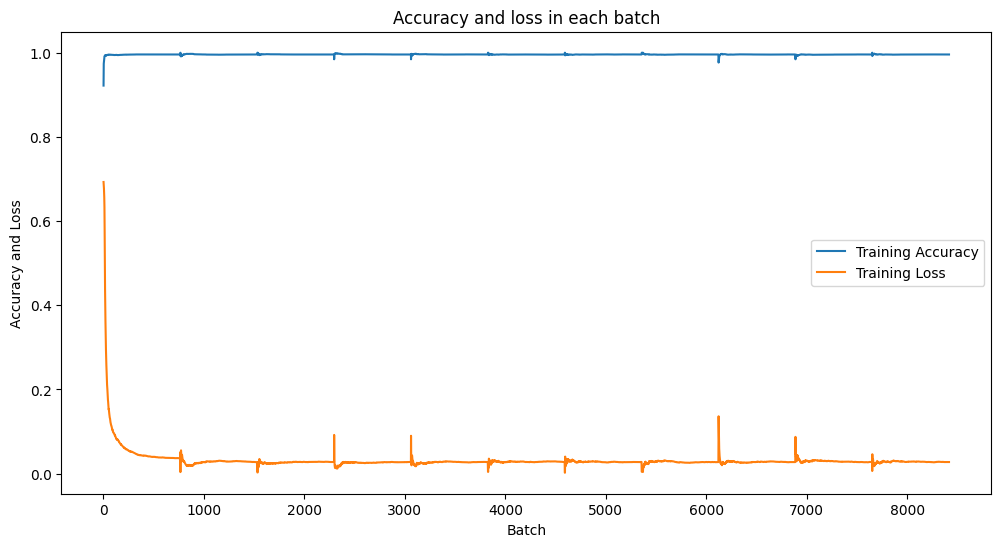

In [4]:
plt_batch(batch_result("slurm-26360668.out"))

In [8]:
def get_epoch_results(file_path):

    # Read the contents of the file
    with open(file_path, 'r') as file:
        output = file.read()

    # Regular expressions for epoch summary data
    # epoch_pattern = re.compile(r'\d+/(\d+) \[=+\] - \d+s \d+s/step - loss: (.*?) - accuracy: (.*?) - val_loss: (.*?) - val_accuracy: (.*?)\s')
    epoch_pattern = re.compile(r'\d+/(\d+) \[=+\] - \d+s \d+m?s/step - loss: (.*?) - accuracy: (.*?) - val_loss: (.*?) - val_accuracy: (.*)')
    # Find all matches in the output
    epoch_data = epoch_pattern.findall(output)

    epoch_results = []

    for i, (_, loss, accuracy, val_loss, val_accuracy) in enumerate(epoch_data, start=1):
        epoch_results.append({
            'epoch': i,  # Manually assign epoch numbers starting from 1
            'loss': float(clean_string(loss)),
            'accuracy': float(clean_string(accuracy)),
            'val_loss': float(clean_string(val_loss)),
            'val_accuracy': float(clean_string(val_accuracy))
        })
    epoch_df = pd.DataFrame(epoch_results)
    return epoch_df


In [9]:
def draw_epoch_graph(epoch_df):
    # Convert to DataFrame
    # epoch_df = pd.DataFrame(epoch_results)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(epoch_df['epoch'], epoch_df['accuracy'], label='Training Accuracy')
    plt.plot(epoch_df['epoch'], epoch_df['loss'], label='Training Loss')
    plt.plot(epoch_df['epoch'], epoch_df['val_accuracy'], label='Validation Accuracy')
    plt.plot(epoch_df['epoch'], epoch_df['val_loss'], label='Validation Loss')

    ax = plt.gca() 
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.title('Training and Validation Loss by Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [10]:
result_0668 = get_epoch_results("slurm-26360668.out")
draw_epoch_graph(result_0668)

NameError: name 'clean_string' is not defined

# From results/history_*.csv

Get first full training on 01/02

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def plt_result(csv_file):
    history_df = pd.read_csv(csv_file)
    draw_epoch_graph(history_df)

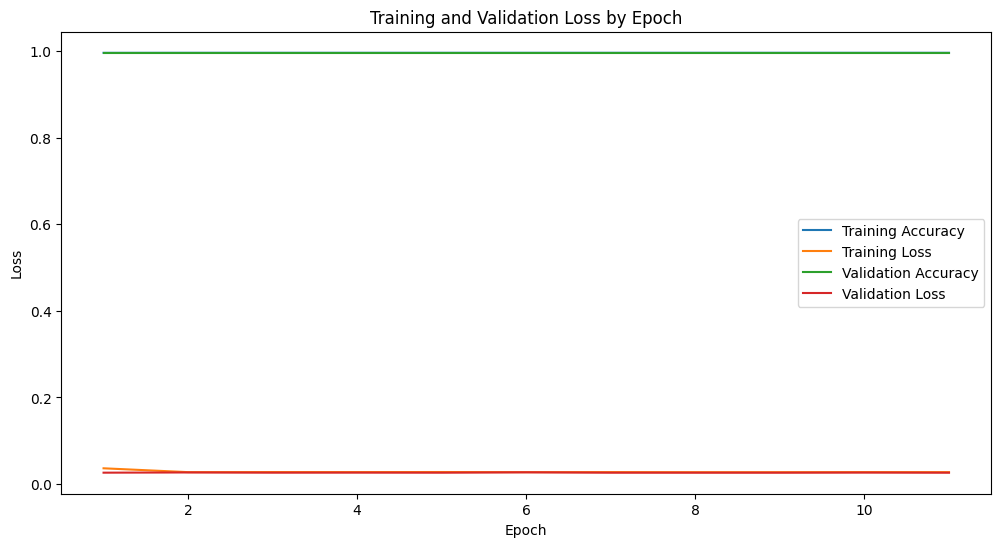

In [13]:
plt_result("result_public_data/cm_1.csv")

# Reform the graph

> 01/04

don't put it in on graph, but two; the accuracy and loss should be different.

In [14]:
import matplotlib.pyplot as plt

def draw_results(history_df):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.ylim(0.7,1.0)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_df:
        plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.ylim(0.0,0.6)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    if 'val_loss' in history_df:
        plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

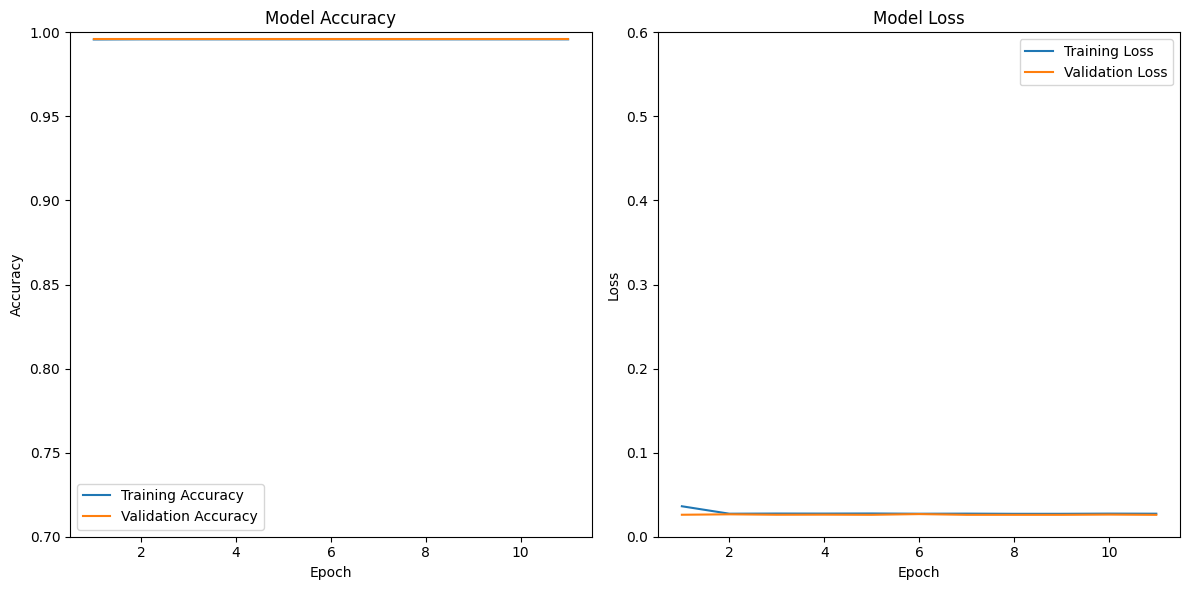

In [15]:
full_result_1 = pd.read_csv("result_public_data/cm_1.csv")
draw_results(full_result_1)

# Confusion matrix

> 1.11

True positive rate/Recall: $TPR = \frac{TP}{TP + FN}$

Precision: $\frac{TP}{TP+FP}$

False Alarm Rate $FAR=\frac{FP}{FP+TN}$

$F1-score = 2 \times \frac{Precision\times Recall}{Precision + Recall}$

In [17]:
def cal_metric(df_cm):
    df_cm["tpr"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FN'])
    df_cm["far"] = df_cm['val_FP']/(df_cm['val_FP']+ df_cm['val_TN'])
    df_cm["precision"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FP'])
    df_cm["F1"] = 2*df_cm['tpr']*df_cm['precision']/(df_cm['tpr']+ df_cm['precision'])

In [18]:
cal_metric(full_result_1)
full_result_1

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.036237,0.995750,0.026134,0.995996,12188,0,49,0,1,0.0,0.0,NaN,NaN
1,0.027375,0.995832,0.026644,0.995996,12188,0,49,0,2,0.0,0.0,NaN,NaN
2,0.027567,0.995832,0.026149,0.995996,12188,0,49,0,3,0.0,0.0,NaN,NaN
3,0.027519,0.995832,0.026252,0.995996,12188,0,49,0,4,0.0,0.0,NaN,NaN
4,0.027640,0.995832,0.026081,0.995996,12188,0,49,0,5,0.0,0.0,NaN,NaN
5,0.027348,0.995832,0.026906,0.995996,12188,0,49,0,6,0.0,0.0,NaN,NaN
6,0.027473,0.995832,0.026068,0.995996,12188,0,49,0,7,0.0,0.0,NaN,NaN
7,0.027251,0.995832,0.026058,0.995996,12188,0,49,0,8,0.0,0.0,NaN,NaN
8,0.027262,0.995832,0.026052,0.995996,12188,0,49,0,9,0.0,0.0,NaN,NaN
9,0.027487,0.995832,0.026339,0.995996,12188,0,49,0,10,0.0,0.0,NaN,NaN


In [19]:
def draw_metrics(history_df):
    plt.figure(figsize=(12, 6))

    plt.plot(history_df['epoch'], history_df['tpr'], label='True positive rate')
    plt.plot(history_df['epoch'], history_df['far'], label='False alarm rate')
    plt.plot(history_df['epoch'], history_df['precision'], label='Precision')
    plt.plot(history_df['epoch'], history_df['F1'], label='F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title('Matrics')
    plt.legend()
    
    plt.show()

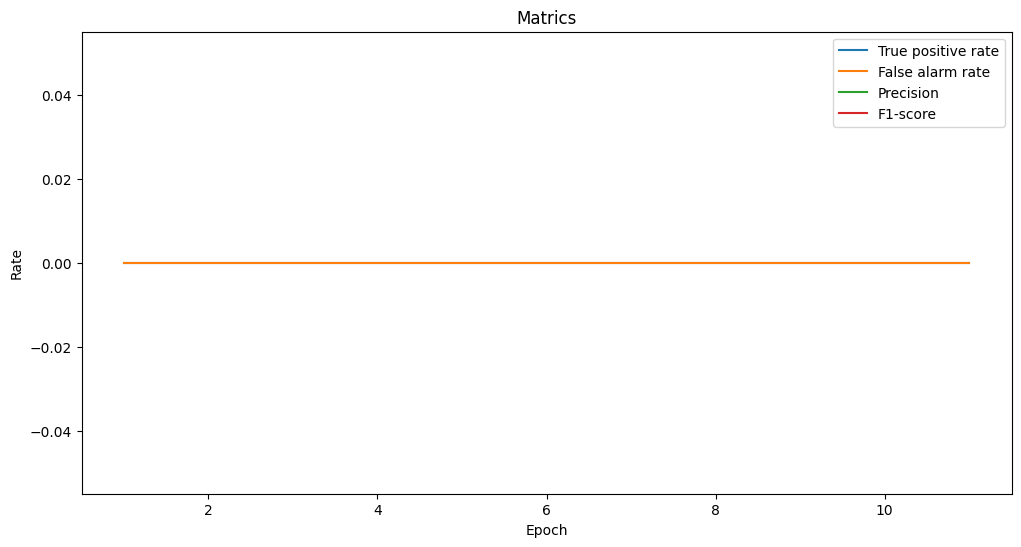

In [20]:
draw_metrics(full_result_1)

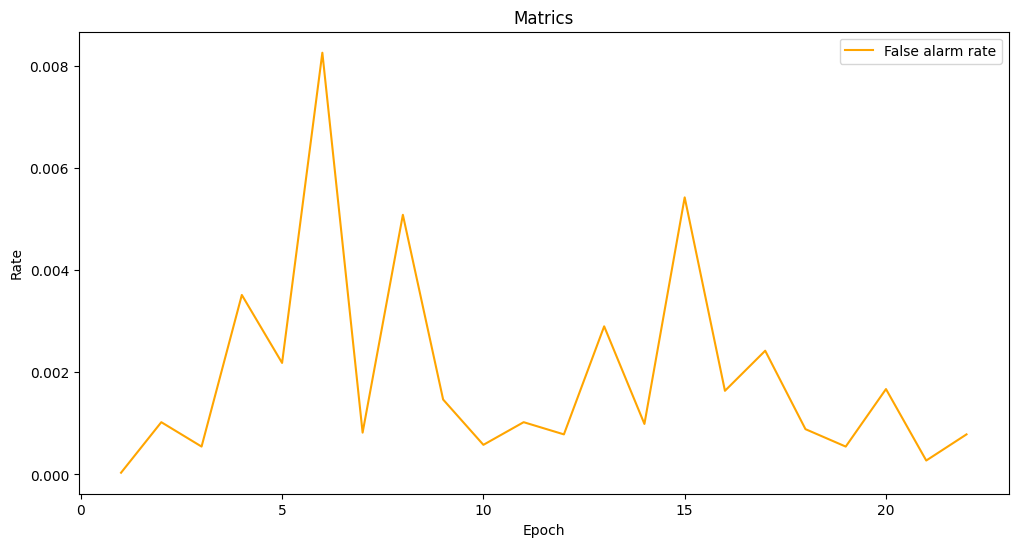

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(full_result_2_cm['epoch'], 
         full_result_2_cm['far'], 
         color='orange',
         label='False alarm rate')
plt.xlabel('Epoch')
plt.ylabel('Rate')
plt.title('Matrics')
plt.legend()

plt.show()

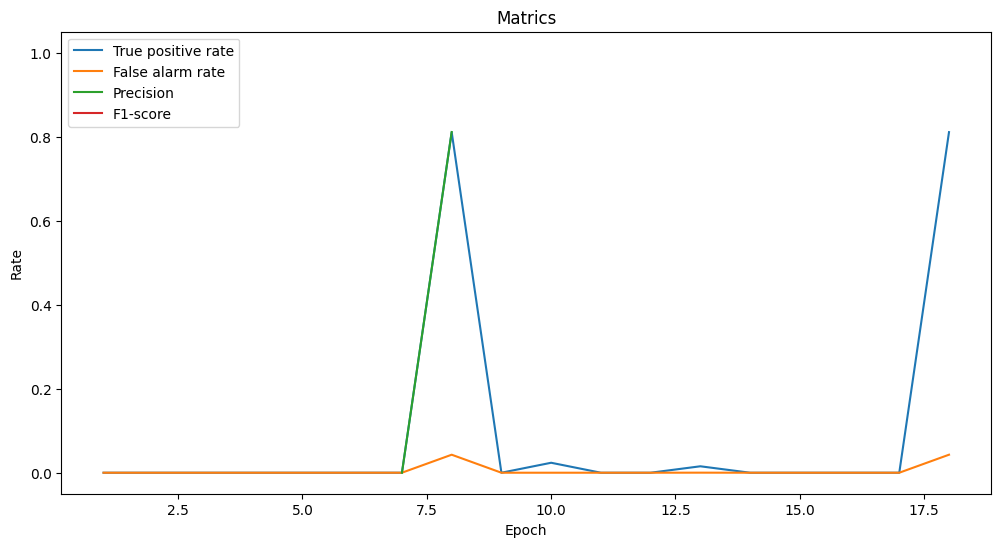

In [16]:
cal_metric(full_result_3_cm)
draw_metrics(full_result_3_cm)

In [17]:
full_result_3_cm

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.494390,0.808673,0.479590,0.814858,29308,0,6659,0,1,0.000000,0.000000,NaN,NaN
1,0.487943,0.809403,0.477683,0.814858,29308,0,6659,0,2,0.000000,0.000000,NaN,NaN
2,0.486579,0.809396,0.479063,0.814858,29308,0,6659,0,3,0.000000,0.000000,NaN,NaN
3,0.488782,0.809403,0.478819,0.814858,29308,0,6659,0,4,0.000000,0.000000,NaN,NaN
4,0.488856,0.809403,0.480414,0.814858,29308,0,6659,0,5,0.000000,0.000000,NaN,NaN
5,0.488376,0.809403,0.481096,0.814858,29308,0,6659,0,6,0.000000,0.000000,NaN,NaN
6,0.475499,0.809674,0.383730,0.814830,29307,1,6659,0,7,0.000000,0.000034,0.000000,NaN
7,0.317845,0.880144,0.266563,0.930047,28051,1257,1259,5400,8,0.810933,0.042889,0.811176,0.811054
8,0.457608,0.831306,0.470007,0.814858,29308,0,6659,0,9,0.000000,0.000000,NaN,NaN
9,0.501334,0.807401,0.469103,0.819251,29308,0,6501,158,10,0.023727,0.000000,1.000000,0.046355


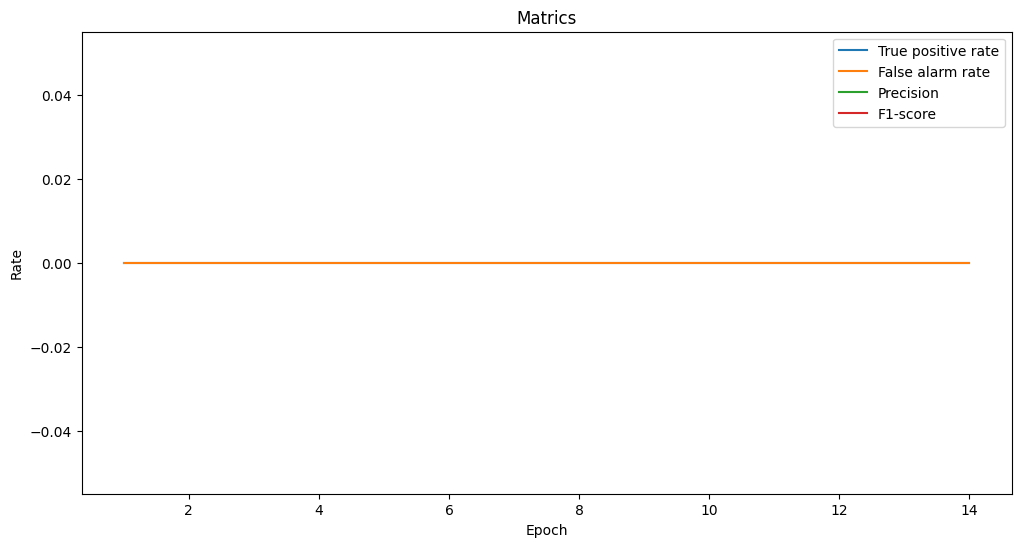

In [12]:
cal_metric(full_result_4_cm)
draw_metrics(full_result_4_cm)

In [13]:
full_result_4_cm

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.495201,0.808222,0.479155,0.814858,29308,0,6659,0,1,0.0,0.0,NaN,NaN
1,0.488691,0.809403,0.479096,0.814858,29308,0,6659,0,2,0.0,0.0,NaN,NaN
2,0.488103,0.809403,0.478521,0.814858,29308,0,6659,0,3,0.0,0.0,NaN,NaN
3,0.487849,0.809403,0.478021,0.814858,29308,0,6659,0,4,0.0,0.0,NaN,NaN
4,0.487297,0.808854,0.478041,0.814858,29308,0,6659,0,5,0.0,0.0,NaN,NaN
5,NaN,0.809403,NaN,0.814858,29308,0,6659,0,6,0.0,0.0,NaN,NaN
6,NaN,0.809403,NaN,0.814858,29308,0,6659,0,7,0.0,0.0,NaN,NaN
7,NaN,0.809403,NaN,0.814858,29308,0,6659,0,8,0.0,0.0,NaN,NaN
8,NaN,0.809403,NaN,0.814858,29308,0,6659,0,9,0.0,0.0,NaN,NaN
9,NaN,0.809403,NaN,0.814858,29308,0,6659,0,10,0.0,0.0,NaN,NaN
